# Sales

### Importing Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
Data = pd.read_excel(r'D:\Downloads\questions.xlsx')
Data

,date,customerid,product_quantity,price_per_item,region,transaction_id
0,2021-10-09,CC1,3,33,E,1
1,2021-10-09,CC1,4,22,A,2
2,2020-12-26,CC1,2,111,F,3
3,2020-12-27,CC2,1,22,G,4
4,2020-12-28,CC2,4,11000,G,5
5,2020-12-29,CC3,2,33,S,6
6,2020-12-30,CC3,1,22,S,7
7,2021-10-09,CC4,3,11000,E,8
8,2021-10-10,CC4,4,33,R,9


### Adding Sales in Dataset

In [3]:
Data["sales"] = Data["product_quantity"]*Data["price_per_item"]
Data

,date,customerid,product_quantity,price_per_item,region,transaction_id,sales
0,2021-10-09,CC1,3,33,E,1,99
1,2021-10-09,CC1,4,22,A,2,88
2,2020-12-26,CC1,2,111,F,3,222
3,2020-12-27,CC2,1,22,G,4,22
4,2020-12-28,CC2,4,11000,G,5,44000
5,2020-12-29,CC3,2,33,S,6,66
6,2020-12-30,CC3,1,22,S,7,22
7,2021-10-09,CC4,3,11000,E,8,33000
8,2021-10-10,CC4,4,33,R,9,132


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              9 non-null      datetime64[ns]
 1   customerid        9 non-null      object        
 2   product_quantity  9 non-null      int64         
 3   price_per_item    9 non-null      int64         
 4   region            9 non-null      object        
 5   transaction_id    9 non-null      int64         
 6   sales             9 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 632.0+ bytes


### Data Visualization

<AxesSubplot:title={'center':'No of time Customer'}, xlabel='customerid', ylabel='count'>

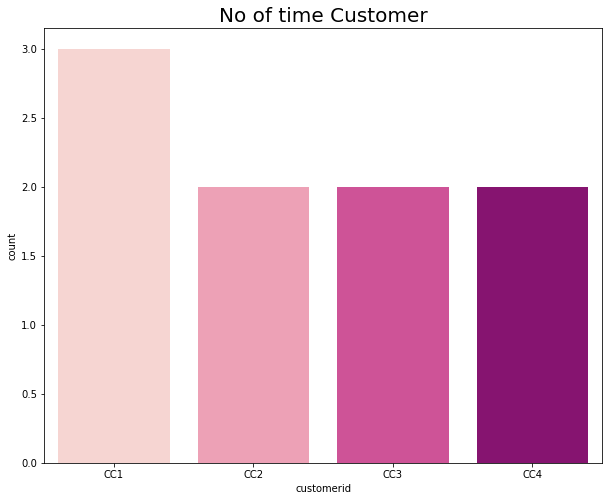

In [5]:
plt.figure(figsize=(10,8))
plt.title('No of time Customer',fontsize = 20)
sns.countplot(data = Data, x = "customerid", palette=('RdPu'))

<AxesSubplot:title={'center':'No of Sales in each region'}, xlabel='region', ylabel='count'>

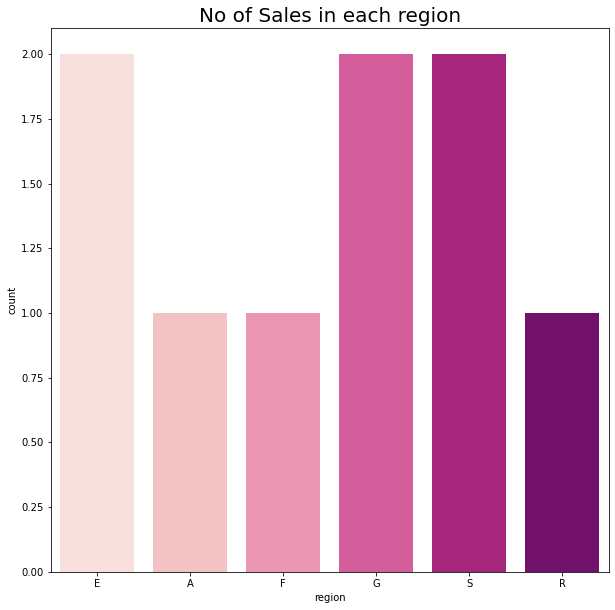

In [6]:
plt.figure(figsize=(10,10))
plt.title('No of Sales in each region',fontsize = 20)
sns.countplot(data = Data, x = "region", palette=('RdPu'))

### Questions and Answers

### 1) Which customer id bought maximum products?

In [7]:
data = Data.groupby(by='customerid',group_keys=True).product_quantity.sum()
data

customerid
CC1    9
CC2    5
CC3    3
CC4    7
Name: product_quantity, dtype: int64

#### From the above Data CC1 have bought more Products

### 2) Get sales during Christmas period (21 dec 2020 - 27 dec 2020) by region

In [8]:
Data[Data["date"].between('2020-12-21','2020-12-27')]

,date,customerid,product_quantity,price_per_item,region,transaction_id,sales
2,2020-12-26,CC1,2,111,F,3,222
3,2020-12-27,CC2,1,22,G,4,22


### 3) Get count of transactions by region where customers had greater than 10000 sales and less than 10000 sales

In [10]:
Data.groupby(by=['region','transaction_id'],group_keys=True).sales.sum()

region  transaction_id
A       2                    88
E       1                    99
        8                 33000
F       3                   222
G       4                    22
        5                 44000
R       9                   132
S       6                    66
        7                    22
Name: sales, dtype: int64

In [11]:
Data1 = Data[Data['sales'] > 10000 ]

In [12]:
Data1

,date,customerid,product_quantity,price_per_item,region,transaction_id,sales
4,2020-12-28,CC2,4,11000,G,5,44000
7,2021-10-09,CC4,3,11000,E,8,33000


In [13]:
Data2 = Data[Data['sales'] <= 10000 ]

In [14]:
Data2

,date,customerid,product_quantity,price_per_item,region,transaction_id,sales
0,2021-10-09,CC1,3,33,E,1,99
1,2021-10-09,CC1,4,22,A,2,88
2,2020-12-26,CC1,2,111,F,3,222
3,2020-12-27,CC2,1,22,G,4,22
5,2020-12-29,CC3,2,33,S,6,66
6,2020-12-30,CC3,1,22,S,7,22
8,2021-10-10,CC4,4,33,R,9,132
